In [1]:
print('Data Visualization Seaborn')
print('Data Visualization Seaborn')
print('Data Visualization Seaborn')
print('Data Visualization Seaborn')

Data Visualization Seaborn
Data Visualization Seaborn
Data Visualization Seaborn
Data Visualization Seaborn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px

In [3]:
import seaborn as sns

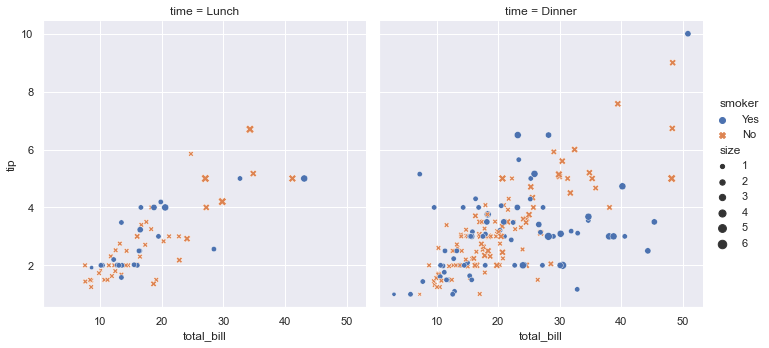

In [91]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [4]:
gps = pd.read_csv('googleplaystore_v2.csv', header=0)

gps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [5]:
gps1= gps[~gps.Rating.isnull()]
gps1 = gps1[(gps1.Reviews <= gps1.Installs)] 
gps1[gps1['Android Ver'].isnull()]
gps1 = gps1[~(gps1['Android Ver'].isnull() & (gps1.Category=='1.9'))]
gps1['Android Ver'].value_counts()
gps1['Android Ver'].mode()[0]
gps1['Android Ver']= gps1['Android Ver'].fillna(gps1['Android Ver'].mode()[0])
gps1['Current Ver'].value_counts()
gps1['Current Ver'].mode()[0]
gps1['Current Ver']= gps1['Current Ver'].fillna(gps1['Current Ver'].mode()[0])
gps1.Price.value_counts()
gps1["Price"]=gps1["Price"].apply(lambda x: 0 if x=="0" else float(x[1:]))
gps1.Price.apply(lambda x: ["Android Ver"] =="4.1 and up").mean()
gps1.Reviews= gps1.Reviews.astype('int32')
gps1["Installs"]=gps1["Installs"].apply(lambda x : int(x.replace(',','').replace('+','')))
gps1[(gps1.Reviews > gps1.Installs)].shape 
gps1[(gps1.Reviews > gps1.Installs)]
gps1 = gps1[(gps1.Reviews <= gps1.Installs)] 
gps1[(gps1.Type== 'Free') & (gps1.Price >0)]
gps1[gps1.Price >=30]
gps1= gps1[gps1.Price <30]
gps1[(gps1.Reviews > gps1.Installs)].shape 

(0, 13)

In [6]:
gps1.Rating.dtype

dtype('float64')

In [69]:
gps1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
import warnings
warnings.filterwarnings("ignore")

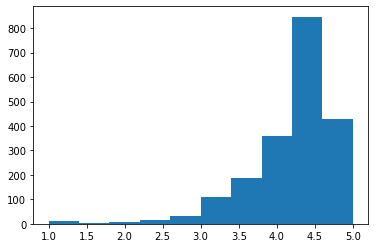

In [8]:
### compare with hist in matplot and seaborn

plt.hist(gps1.Rating)  ## we can also use gps1.Rating.plot.hist()
plt.show()

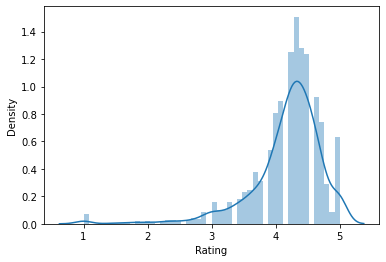

In [70]:
sns.distplot(gps1.Rating)
plt.show()

<AxesSubplot:xlabel='Rating'>

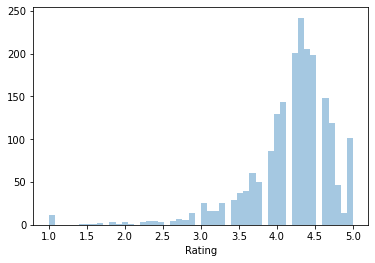

In [73]:
#### Feedback:The KDE parameter in the distplot checks whether a Gaussian Density Estimate is required or not. By default, it is set as True. Hence, setting the KDE as False would produce only the distribution plot shown above.


sns.distplot(gps1.Rating,kde = False)

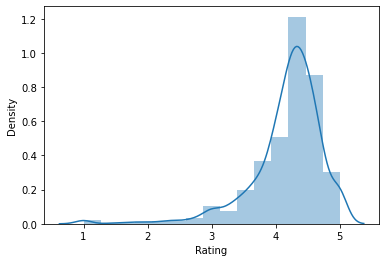

In [74]:
## Hist in seaboen with bins (bins work same as in matplot)

sns.distplot(gps1.Rating, bins= 15)
plt.show()

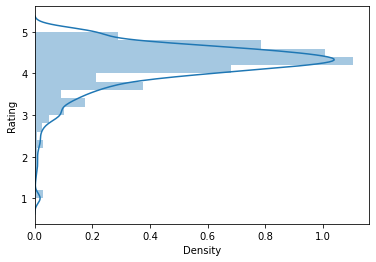

In [75]:
sns.distplot(gps1.Rating, bins= 20,vertical = True)
plt.show()

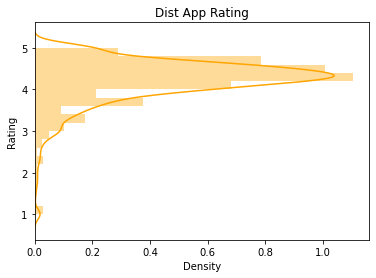

In [76]:
sns.distplot(gps1.Rating, bins= 20,vertical = True, color= 'orange')
plt.title("Dist App Rating", fontsize= 12)
plt.show()

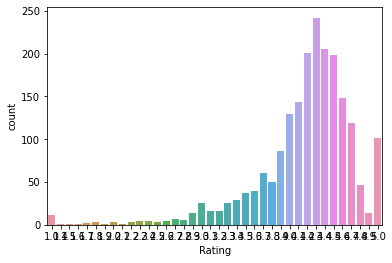

In [77]:
### countplot

sns.countplot(x="Rating", data=gps1)
plt.show()

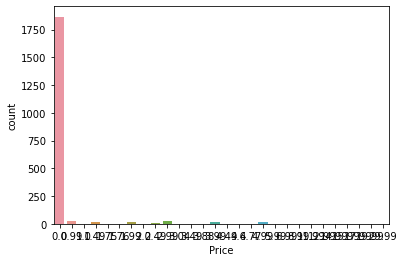

In [78]:
sns.countplot(x="Price", data=gps1)
plt.show()

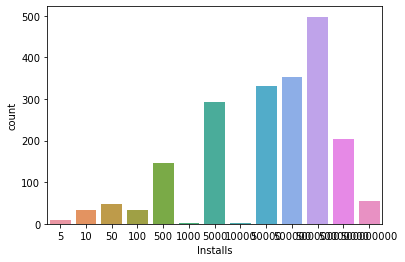

In [79]:
sns.countplot(x="Installs", data=gps1)
plt.show()

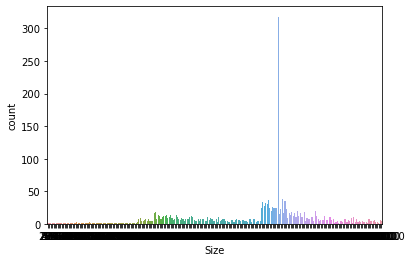

In [80]:
sns.countplot(x="Size", data=gps1)
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='count'>

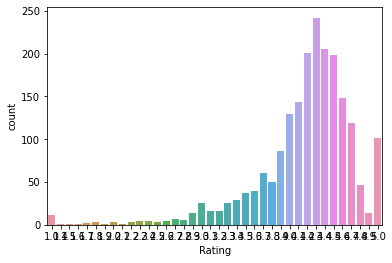

In [81]:
sns.countplot(gps1.Rating)

In [20]:
### Styling Option

#Change themes

plt.style.available ## to check thems available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [92]:
## set new style

# defult theme - sns.set_theme() 
# plt.style.use("ggplot") - will change the theme to ggplot

In [22]:
### Pie and Bar Chart

print('### Pie and Bar Chart')
print('### Pie and Bar Chart')
print('### Pie and Bar Chart')

### Pie and Bar Chart
### Pie and Bar Chart
### Pie and Bar Chart


In [12]:
## Will use content rating column as categorical being non Variable

gps1['Content Rating'].value_counts()

Everyone           1583
Teen                247
Mature 17+           99
Everyone 10+         74
Adults only 18+       1
Unrated               1
Name: Content Rating, dtype: int64

In [13]:
## droop content rating

gps1= gps1[~gps1['Content Rating'].isin(['Adults only 18+','Unrated'])]
gps1.shape

(2003, 13)

In [84]:
## will fix the data set

gps1.reset_index(inplace= True, drop= True)
gps1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             2003 non-null   object 
 1   Category        2003 non-null   object 
 2   Rating          2003 non-null   float64
 3   Reviews         2003 non-null   int32  
 4   Size            2003 non-null   float64
 5   Installs        2003 non-null   int64  
 6   Type            2003 non-null   object 
 7   Price           2003 non-null   float64
 8   Content Rating  2003 non-null   object 
 9   Genres          2003 non-null   object 
 10  Last Updated    2003 non-null   object 
 11  Current Ver     2003 non-null   object 
 12  Android Ver     2003 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 195.7+ KB


In [14]:
gps1['Content Rating'].value_counts()

Everyone        1583
Teen             247
Mature 17+        99
Everyone 10+      74
Name: Content Rating, dtype: int64

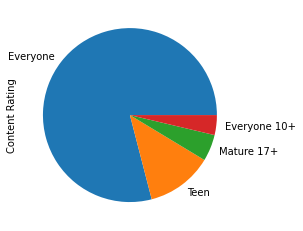

In [15]:
## Pie chart

gps1['Content Rating'].value_counts().plot.pie()
plt.show()

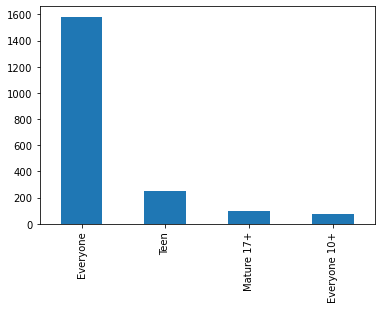

In [87]:
## Bar chart vertical

gps1['Content Rating'].value_counts().plot.bar()
plt.show()

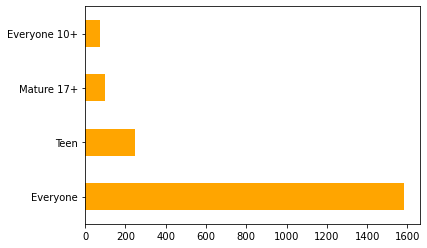

In [88]:
## Bar chart horizantal- use plot.barh(color=''), also can change color

gps1['Content Rating'].value_counts().plot.barh(color='orange')
plt.show()

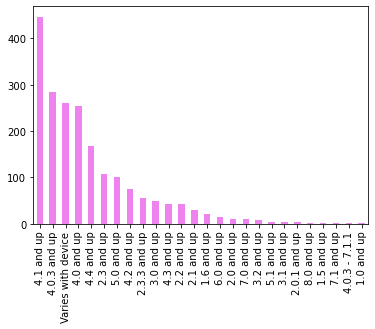

In [89]:
## Practice

#Question - Plot a bar plot for checking the 4th highest Android version type

gps1["Android Ver"].value_counts().plot.bar(color='violet')
plt.show()

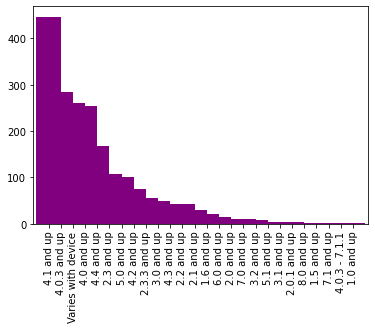

In [90]:
## Practice ## with width

#Question - Plot a bar plot for checking the 4th highest Android version type

gps1["Android Ver"].value_counts().plot.bar(width= 2, color='purple')
plt.show()

In [49]:
import scipy.stats as stats

In [56]:
print('scatter plots')
print('scatter plots')
print('scatter plots')

 ## plyplot.scatter()
## sns.scatterplot()
## sns.jointplot(x-axis, y-axis)

scatter plots
scatter plots
scatter plots


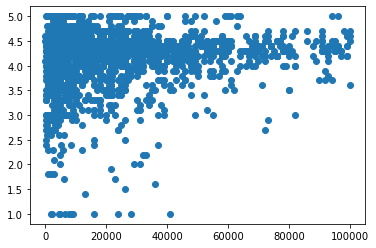

In [91]:
## scatter plot, size vs rating where size is x-axis and rating is y-axis

plt.scatter(gps1.Size, gps1.Rating)
plt.show()

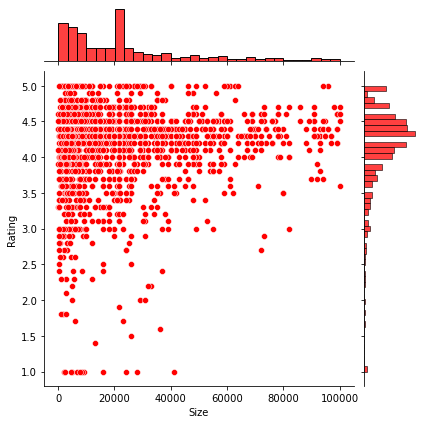

In [92]:
sns.jointplot(gps1.Size, gps1.Rating, color='red')
plt.show()

<Figure size 720x720 with 0 Axes>

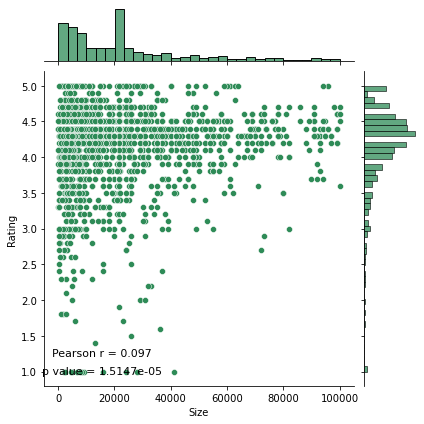

In [93]:
import scipy.stats as ss

#str1 will hold the value of Pearson r

str1 = 'Pearson r = {}'.format(ss.pearsonr(gps1.Size,gps1.Rating)[0].round(3))

#str2 will hold the p value

str2 = 'p value = {}'.format(ss.pearsonr(gps1.Size,gps1.Rating)[1].round(9))   
plt.figure(figsize = (10,10))
sns.jointplot(gps1.Size, gps1.Rating, color='seagreen')


#Manually align the position of str1 and str2

plt.text(-1250,1.25, str1,horizontalalignment='center',verticalalignment='center',fontsize = 11 )
plt.text(-1250,1.0,str2,horizontalalignment='center',verticalalignment='center',fontsize = 11)
plt.show()

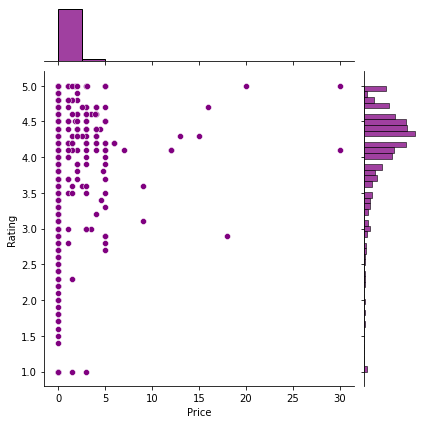

In [94]:
## Price vs Rating

sns.jointplot(gps1.Price, gps1.Rating, color='purple')
plt.show()

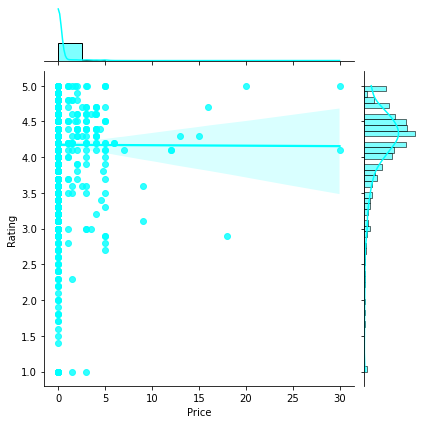

In [113]:
## Regression line kind= 'reg'

sns.jointplot(gps1.Price, gps1.Rating, color='cyan', kind='reg')
plt.show()

In [105]:
print('pair plots')
print('pair plots')
print('pair plots')
print('pair plots')

 ## sns.pairplot()


pair plots
pair plots
pair plots
pair plots


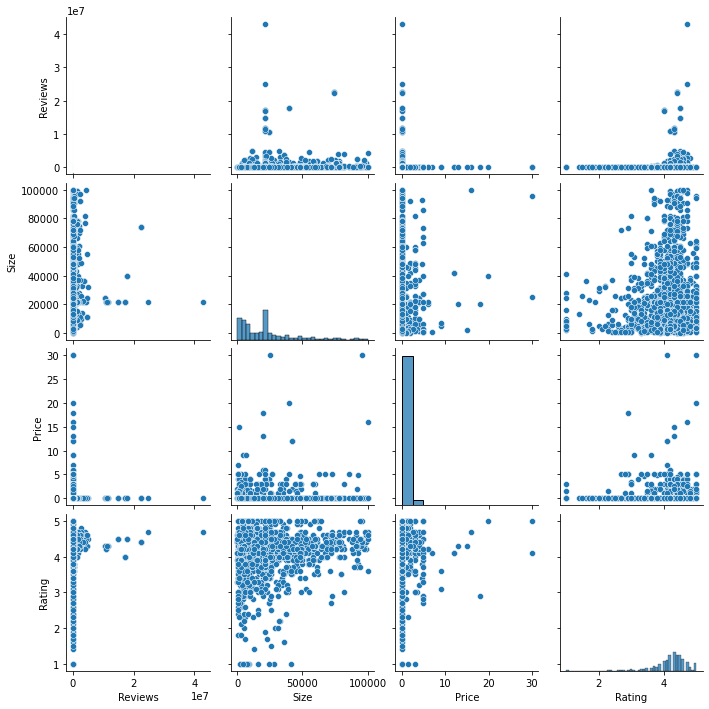

In [110]:
sns.pairplot(gps1[['Reviews','Size','Price','Rating']])
plt.show()

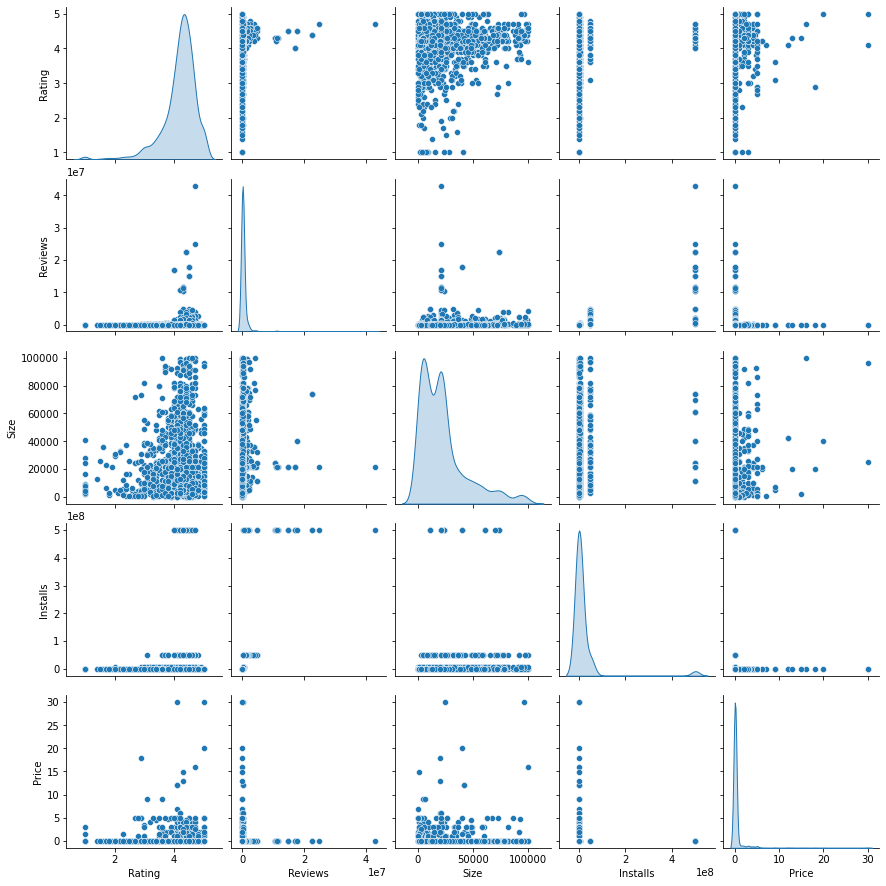

In [116]:
sns.pairplot(gps1, diag_kind='kde')
plt.show()

In [9]:
print('Revisiting Bar G and Box plots')
print('Revisiting Bar G and Box plots')
print('Revisiting Bar G and Box plots')
print('Revisiting Bar G and Box plots')
print('Revisiting Bar G and Box plots')


Revisiting Bar G and Box plots
Revisiting Bar G and Box plots
Revisiting Bar G and Box plots
Revisiting Bar G and Box plots
Revisiting Bar G and Box plots


<AxesSubplot:xlabel='Content Rating'>

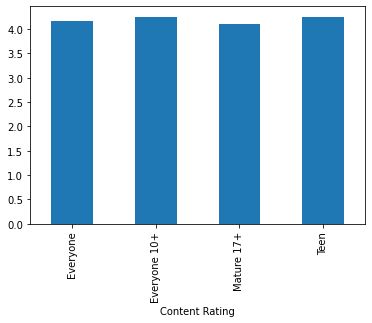

In [16]:
## content rating vs rating

# in matplotlib

gps1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

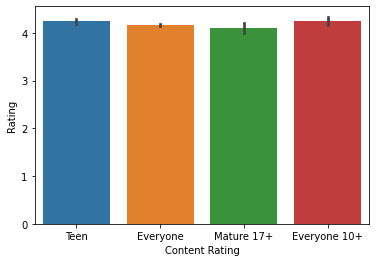

In [17]:
# in sns
## estimator by defult is mean / average

sns.barplot(data= gps1, x= 'Content Rating', y= 'Rating')

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

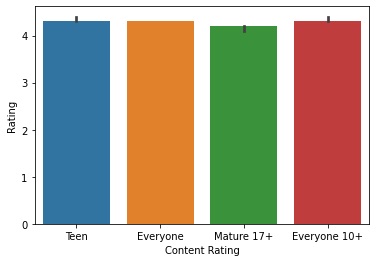

In [18]:
# in sns with estimator function

sns.barplot(data= gps1, x= 'Content Rating', y= 'Rating', estimator= np.median)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

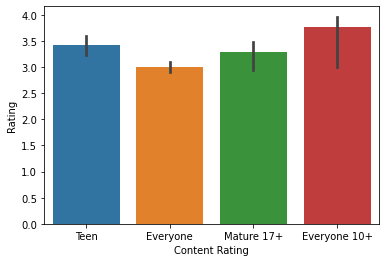

In [19]:
# in sns with estimator function with lambda

sns.barplot(data= gps1, x= 'Content Rating', y= 'Rating', estimator= lambda x: np.quantile(x,0.05))

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

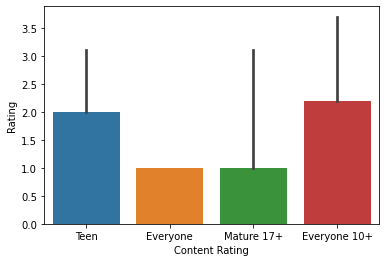

In [23]:
sns.barplot(data= gps1, x= 'Content Rating', y= 'Rating', estimator= np.min)

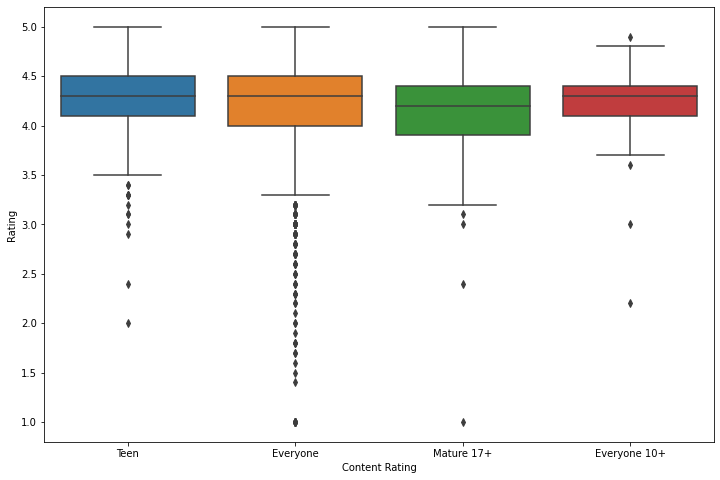

In [26]:
### Box plot - revisted- help show all paramenters in on graph eg mean median quartile and distribution etc

plt.figure(figsize = [12,8]) ## figsize use to increase size of polt figsize= [height,width]

sns.boxplot(gps1['Content Rating'], gps1.Rating)
plt.show()



<AxesSubplot:xlabel='Rating'>

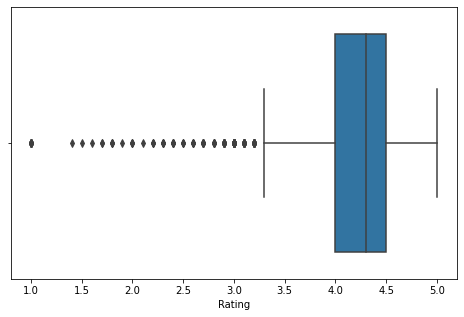

In [81]:
##Question - Plot a box plot for the Rating column only

plt.figure(figsize = [8,5])
sns.boxplot(gps1["Rating"])

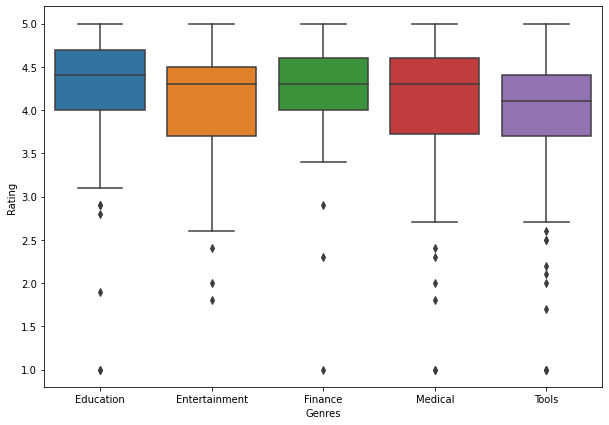

In [40]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres

plt.figure(figsize = [10,7])
gps1['Genres'].value_counts()
sns.boxplot(gps1[gps1.Genres.isin(['Tools','Entertainment','Education','Medical','Finance'])].Genres,gps1['Rating'])
plt.show()

In [41]:
print('Heat Map')
print('Heat Map')
print('Heat Map')
print('Heat Map')
print('Heat Map')

Heat Map
Heat Map
Heat Map
Heat Map
Heat Map


In [42]:
?pd.qcut

In [47]:
### use pd.qcut to cut the size in bins or buckets on quartile basis

gps1['Size bucket']= pd.qcut(gps1.Size,[0,0.2,0.4,0.6,0.8,1], ['Vl','L','M','H','VH'])
gps1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size bucket
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,L


In [49]:
#### The above bins were now used to create the new column called Size_Bucket which stored the binned categories corresponding to the size of each app. Now finally when you prepare the pivot table (corresponding to the aggregation at 20th percentile for ratings), you'll get a grid as follows..

pd.pivot_table(data=gps1, index="Content Rating", columns="Size bucket", values="Rating", aggfunc=lambda x:np.quantile(x,0.2))

Size bucket,Vl,L,M,H,VH
Content Rating,,,,,
Everyone,3.70,3.74,4.0,3.9,4.00
Everyone 10+,3.66,4.08,4.1,4.1,4.06
Mature 17+,3.30,3.68,4.0,3.9,4.10
Teen,3.84,3.92,4.0,3.8,4.10


<AxesSubplot:xlabel='Size bucket', ylabel='Content Rating'>

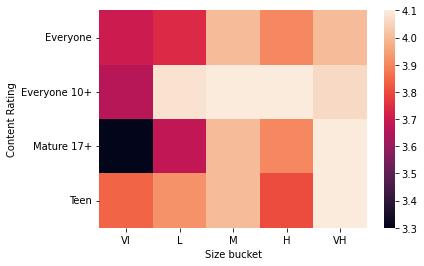

In [52]:
res= pd.pivot_table(data=gps1, index="Content Rating", columns="Size bucket", values="Rating", aggfunc=lambda x:np.quantile(x,0.2))

sns.heatmap(res)

<AxesSubplot:xlabel='Size bucket', ylabel='Content Rating'>

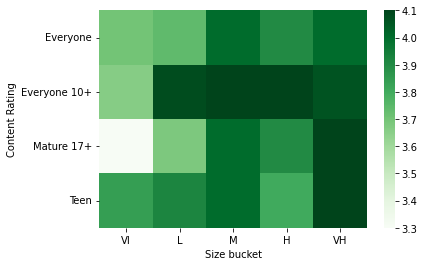

In [55]:
### customization of heat map

sns.heatmap(res,cmap= 'Greens')

<AxesSubplot:xlabel='Size bucket', ylabel='Content Rating'>

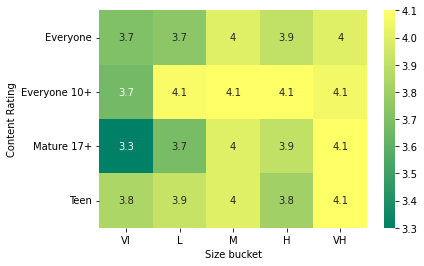

In [62]:
### customization of heat map annotation will give you corosponding values to each box

sns.heatmap(res,cmap= 'summer', annot= True)

In [63]:
print('Line Chart or Worm Graph')
print('Line Chart or Worm Graph')
print('Line Chart or Worm Graph')
print('Line Chart or Worm Graph')
print('Line Chart or Worm Graph')

Line Chart or Worm Graph
Line Chart or Worm Graph
Line Chart or Worm Graph
Line Chart or Worm Graph
Line Chart or Worm Graph


In [65]:
###  Ratings vs Last updated

gps1['Last Updated'].head(3)

3      June 8, 2018
5    March 26, 2017
6    April 26, 2018
Name: Last Updated, dtype: object

In [73]:
### conver to date time frame

pd.to_datetime(gps1['Last Updated']).dt.month

3         6
5         3
6         4
16        7
18        8
         ..
10791    12
10793     8
10800     7
10827     6
10836     7
Name: Last Updated, Length: 2003, dtype: int64

In [74]:
?pd.to_datetime

In [79]:
pd.to_datetime(gps1['Last Updated']).dt.year

3        2018
5        2017
6        2018
16       2018
18       2018
         ... 
10791    2013
10793    2018
10800    2018
10827    2018
10836    2017
Name: Last Updated, Length: 2003, dtype: int64

In [86]:
gps1['Updated Month']= pd.to_datetime(gps1['Last Updated']).dt.month

gps1['Updated Month'].head()


3     6
5     3
6     4
16    7
18    8
Name: Updated Month, dtype: int64

<AxesSubplot:xlabel='Updated Month'>

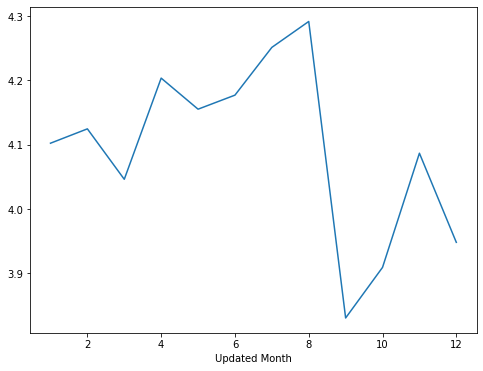

In [88]:
plt.figure(figsize=[8,6])

gps1.groupby(['Updated Month'])['Rating'].mean().plot()

In [89]:
print('Stacked Bar Charts')
print('Stacked Bar Charts')
print('Stacked Bar Charts')
print('Stacked Bar Charts')

Stacked Bar Charts
Stacked Bar Charts
Stacked Bar Charts
Stacked Bar Charts


In [91]:
## comparing Installs across the different months and different categories of Content Rating.

## Installs vs Months vs Categories vs Content Rating

m = pd.pivot_table(data= gps1, values="Installs", index="Updated Month", columns="Content Rating", aggfunc= sum)
m


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated Month,,,,
1,2.518653e+08,1.000000e+05,5.500010e+06,1.100000e+07
2,3.972414e+07,2.500000e+06,1.050050e+07,1.501501e+07
3,2.094331e+08,6.100000e+06,5.010000e+04,1.125000e+07
4,4.313201e+08,1.055000e+07,5.500000e+04,1.605500e+08
5,3.123025e+09,1.016050e+07,5.055000e+07,2.821555e+08
6,2.583350e+09,1.655500e+08,1.811100e+07,1.723210e+08
7,1.691460e+10,3.665650e+08,9.411720e+08,3.642867e+09
8,4.305879e+09,1.541000e+09,1.300606e+09,2.248355e+09
9,7.746305e+07,5.000000e+05,NaN,6.550000e+06


<AxesSubplot:xlabel='Updated Month'>

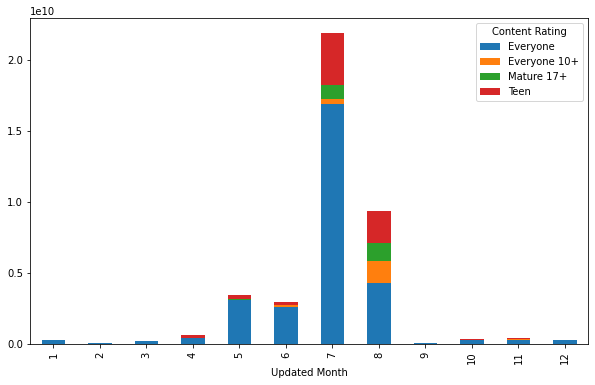

In [92]:
m.plot(kind= 'bar', stacked=True, figsize=[10,6])

<AxesSubplot:xlabel='Updated Month'>

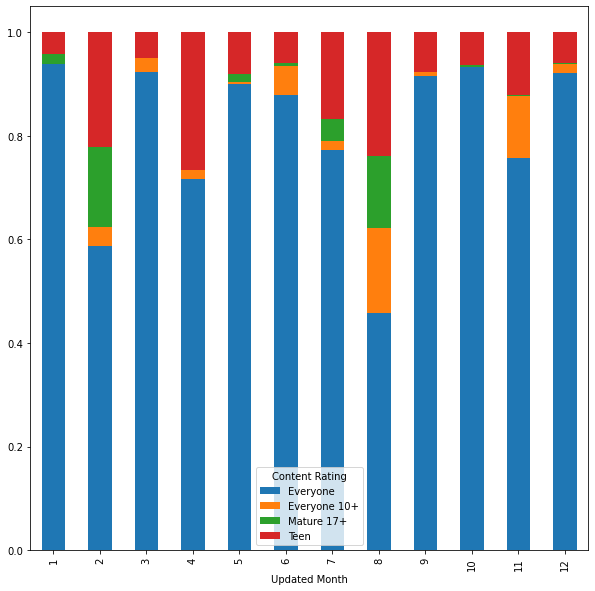

In [95]:
## will now get the percentage of content rating as graph is not very clear and readable

m1= m[['Everyone','Everyone 10+', 'Mature 17+', 'Teen']].apply(lambda x: x/x.sum(), axis=1)

m1.plot(kind= 'bar', stacked=True, figsize=[10,10])

In [96]:
print('Plotly')

Plotly


In [98]:
## Plotly

import plotly.express as px

In [108]:
#Take the table you want to plot in a separate variable

r = gps1.groupby(["Updated Month"])[["Rating"]].mean()

r.reset_index(inplace=True)

In [109]:
r

,Updated Month,Rating
0,1,4.102353
1,2,4.124691
2,3,4.046154
3,4,4.203704
4,5,4.155330
5,6,4.177184
6,7,4.251543
7,8,4.291901
8,9,3.830233
9,10,3.908974


In [114]:
fig = px.line(r, x="Updated Month", y = "Rating", title='Monthy Avg Rating')
fig.show()

In [115]:
## Practice student- Footwear

In [119]:
df=pd.read_csv("Footwear_v2.csv", header=0)
df.head()

,Supplier,Delhi,Mumbai,Jaipur,Hyderabad
0,Supplier 1,4.57%,4.18%,7.90%,8.54%
1,supplier 2,2.60%,1.88%,8.99%,9.23%
2,supplier 3,2.26%,7.48%,6.71%,7.84%
3,supplier 4,6.47%,6.70%,7.94%,9.89%
4,supplier 5,6.82%,1.17%,8.54%,5.67%


In [125]:
df.describe()

,Supplier,Delhi,Mumbai,Jaipur,Hyderabad
count,30,30,30,30,30
unique,30,30,29,29,30
top,Supplier 1,4.57%,2.42%,8.99%,8.54%
freq,1,1,2,2,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Supplier   30 non-null     object
 1   Delhi      30 non-null     object
 2   Mumbai     30 non-null     object
 3   Jaipur     30 non-null     object
 4   Hyderabad  30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [122]:
df.size

150

In [123]:
df.shape

(30, 5)

In [129]:
def clean(string):
    clean="".join(filter(lambda x: x!='%', string))
    return float(clean)

In [130]:
def supply_cleaner(string):
    return string.lower()

In [131]:
#clean the df
df['Supplier']=df['Supplier'].apply(supply_cleaner)
df['Mumbai']=df['Mumbai'].apply(clean)
df['Delhi']=df['Delhi'].apply(clean)
df['Jaipur']=df['Jaipur'].apply(clean)
df['Hyderabad']=df['Hyderabad'].apply(clean)

In [132]:
# Average

df.describe()

,Delhi,Mumbai,Jaipur,Hyderabad
count,30.000000,30.000000,30.000000,30.000000
mean,6.324000,4.555000,7.695667,7.727667
std,2.095982,2.519117,1.586503,2.477642
min,2.260000,0.290000,3.400000,1.370000
25%,5.237500,2.432500,7.017500,6.110000
50%,6.000000,4.020000,7.920000,8.305000
75%,6.782500,6.335000,8.980000,9.135000
max,11.960000,9.850000,9.870000,12.310000


In [133]:
print(6.324-4.555) ## mean delhi - mumbai

1.7690000000000001


<AxesSubplot:>

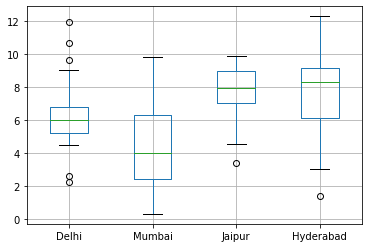

In [139]:
## box plot for cities

df1 = df[['Delhi', 'Mumbai', 'Jaipur', 'Hyderabad']]

df1.boxplot()

In [143]:
df2= df1.mean()
df2


Delhi        6.324000
Mumbai       4.555000
Jaipur       7.695667
Hyderabad    7.727667
dtype: float64

In [145]:
## crypto currency

df=pd.read_csv("crypto.csv")
df.head()

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
0,7144.38,294.66,61.30,99.76,26.23,11.21
1,7022.76,298.89,55.17,102.92,26.32,10.44
2,7407.41,296.26,54.75,86.35,26.38,10.13
3,7379.95,300.47,55.04,87.30,26.49,10.05
4,7207.76,305.71,56.18,87.99,26.82,10.38


In [146]:
df.size

1008

In [148]:
df.shape

(168, 6)

In [149]:
df.info

<bound method DataFrame.info of      Close_btc  Close_et  Close_ltc  Close_mon  Close_neo  Close_qt
0      7144.38    294.66      61.30      99.76  26.230000     11.21
1      7022.76    298.89      55.17     102.92  26.320000     10.44
2      7407.41    296.26      54.75      86.35  26.380000     10.13
3      7379.95    300.47      55.04      87.30  26.490000     10.05
4      7207.76    305.71      56.18      87.99  26.820000     10.38
..         ...       ...        ...        ...        ...       ...
163    2155.80    170.51      24.22      36.84   0.930106      4.62
164    2038.87    157.76      23.74      33.41   0.982348      4.53
165    2202.42    160.40      23.75      38.71   0.826549      4.10
166    2304.98    174.45      29.90      40.12   1.110000      4.66
167    2443.64    190.05      34.45      45.38   1.760000      6.19

[168 rows x 6 columns]>

In [150]:
df.describe()

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,3770.698631,283.217976,48.579464,70.578810,18.859320,10.442679
std,1337.787051,52.163948,11.700914,29.448501,13.272827,3.251350
min,1929.820000,157.360000,23.740000,29.430000,0.826549,3.880000
25%,2601.902500,247.975000,42.767500,45.095000,6.885000,8.192500
50%,3634.280000,295.045000,47.865000,55.140000,19.900000,10.965000
75%,4388.095000,308.672500,55.147500,91.737500,29.320000,12.105000
max,7407.410000,401.490000,86.040000,145.400000,47.490000,19.150000


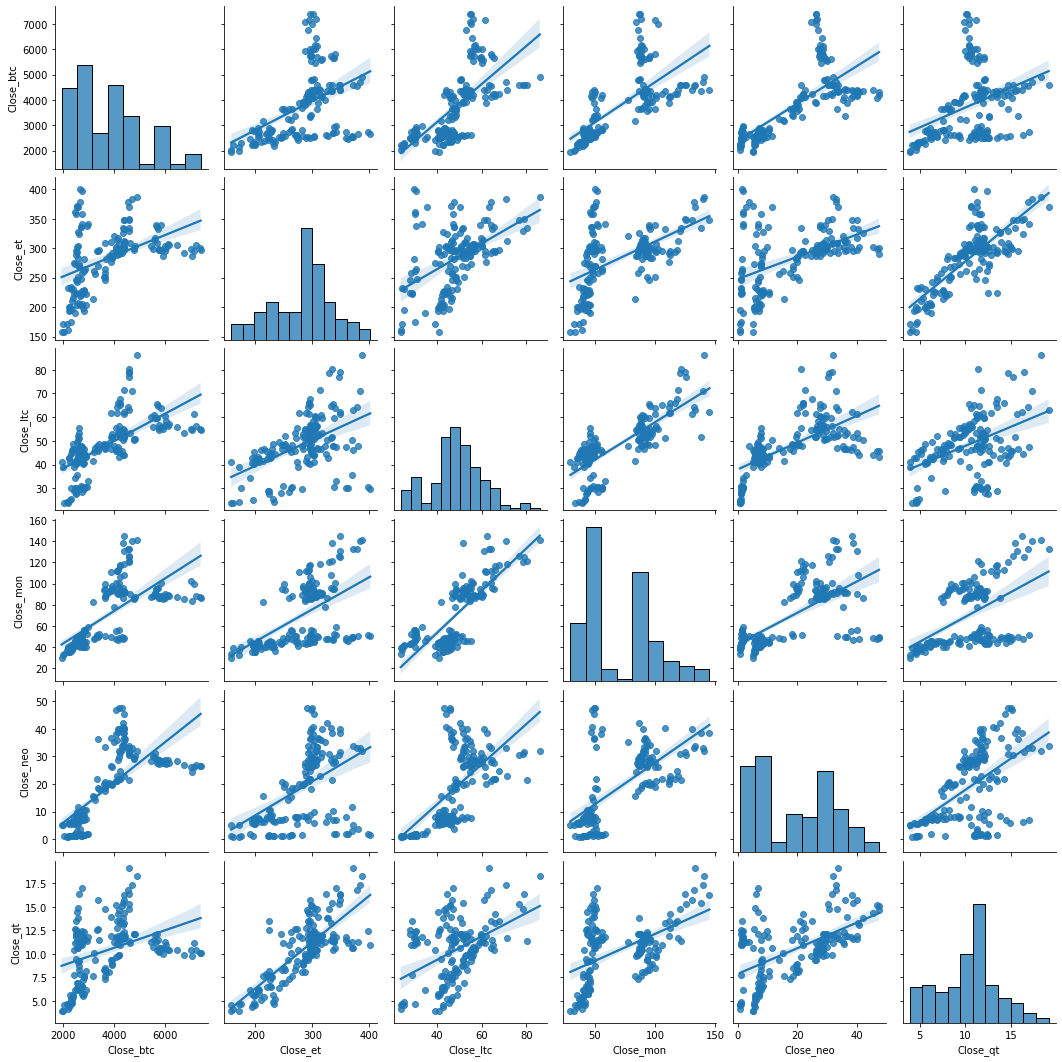

In [159]:
## pair plot

sns.pairplot(df, kind='reg')
plt.show()

In [ ]:
# As you can see the corelation between Close_ltc and Close_mon is positive and a good trend

# Close_btc and Close_neo also show a strong trend positive line

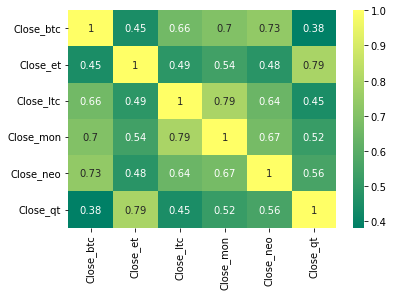

In [157]:
### Heatmap

df2=df.corr()
sns.heatmap(df2,cmap="summer", annot=True)
plt.show()

In [158]:
# Close_et and Close_qt have high corr (0.79)

#Close_neo and Close_btc have a high corr (0.73)

#Close_et and Close_ltc have corr of (0.49)

#Close_et and Close_neo have a corr of (0.48)